In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from criticalZoom import order_checker

In [3]:
def critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0):
    order=2
    iterationNumber=0

    #create a list to store the sigma values, temperatures, and order of the transition
    sigma_list=[]
    temps_list=[]


    #iteratively run the order_checker function until the transition is first order, or until the bounds are too small
    while order==2 and iterationNumber<10 and tmin<tmax and maxsigma-minsigma>2:
        tmin,tmax,minsigma,maxsigma,order,temps,truesigma,Tc=order_checker(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)
        iterationNumber=iterationNumber+1
        print("Iteration number ", iterationNumber)
        if tmax<tmin:
            print("TEMPERATURE BOUNDS REVERSED!!!")
        sigma_list.append(truesigma)
        temps_list.append(temps)

    return order, iterationNumber, sigma_list,temps_list,Tc
    


In [14]:
tmin=8
tmax=20
numtemp=25



#light quark mass
ml=24

#chemical potential
mu=900

lambda1= 4.5 #parameter for mixing between dilaton and chiral field

minsigma=0
maxsigma=300

a0=0. 

order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)




/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.111sec
Crossover or 2nd order
Pseudo-Critical temperature is between 15.5 17.5
Iteration number  1
get_all_sigmas_parallel took 2.721sec
Crossover or 2nd order
Pseudo-Critical temperature is between 16.583333333333332 16.916666666666668
Iteration number  2
get_all_sigmas_parallel took 2.559sec
Crossover or 2nd order
Pseudo-Critical temperature is between 16.694444444444443 16.75
Iteration number  3
get_all_sigmas_parallel took 1.975sec
Crossover or 2nd order
Pseudo-Critical temperature is between 16.719907407407405 16.729166666666664
Iteration number  4
get_all_sigmas_parallel took 1.685sec
Crossover or 2nd order
Pseudo-Critical temperature is between 16.725694444444443 16.727237654320984
Iteration number  5
get_all_sigmas_parallel took 1.840sec
Crossover or 2nd order
Pseudo-Critical temperature is between 16.726144547325102 16.726401748971192
Iteration number  6


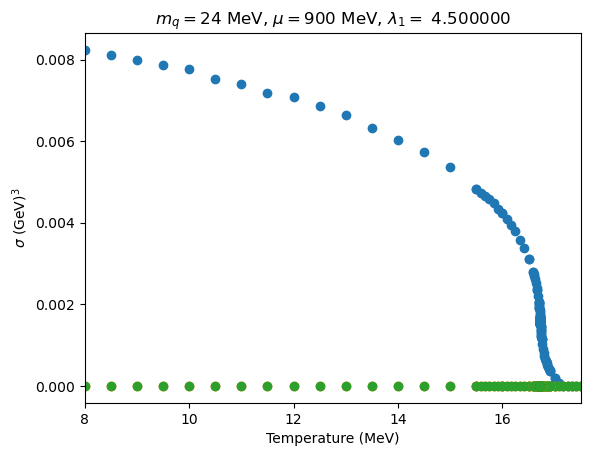

In [17]:
#plot all the sigma values for each iteration
#get the standard colors for matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#find the index of when sigma_list[0][:,0] has its first zero value
#this is the index of the first temperature where the sigma value is zero

max_index=np.argmax(sigma_list[0][:,0]==0)
#find the value of the temperature at this index
max_temp=temps_list[0][max_index]



for i in range(len(sigma_list)):
    plt.scatter(temps_list[i],(sigma_list[i][:,0]/1000)**3,color=colors[0])
    plt.scatter(temps_list[i],(sigma_list[i][:,1]/1000)**3,color=colors[1])
    plt.scatter(temps_list[i],(sigma_list[i][:,2]/1000)**3,color=colors[2])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV)$^3$")
#set the x range
plt.xlim(temps_list[0][0],max_temp)
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()
    

In [18]:

max(sigma_list[0][:,0])

202.0

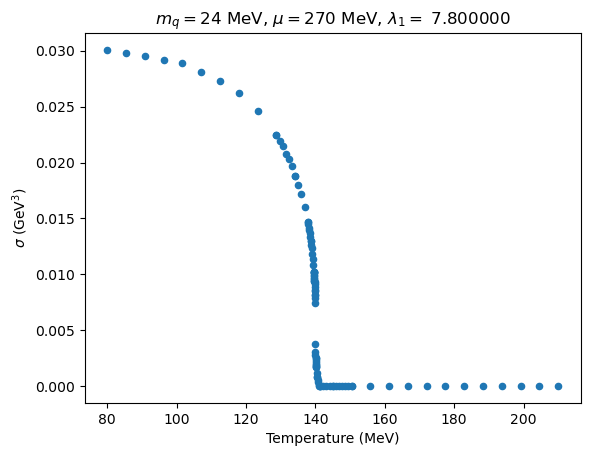

In [37]:
#load the data frame from the pickle file
df2=pd.read_pickle('chiral_transition_mq%i_mu%i_lambda1%f_order%i.pkl' %(ml,mu,lambda1,order))

#plot the data frame
df2.plot.scatter(x='temps',y=['sigma1'])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV$^3$)")
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()

In [6]:
# Save the data as a pandas dataframe
df_all_list = []
for i in range(len(sigma_list)):
    df=pd.DataFrame()
    df['temps']=temps_list[i]
    df['sigma1']=(sigma_list[i][:,0]/1000)**3   
    df['sigma2']=(sigma_list[i][:,1]/1000)**3
    df['sigma3']=(sigma_list[i][:,2]/1000)**3
    df['order']=order
    df['ml']=ml
    df['mu']=mu
    df['lambda1']=lambda1
    df['a0']=a0
    df['Tc']=Tc
    df_all_list.append(df)

# Use pandas concat here
df_all = pd.concat(df_all_list)

#pickle the data frame
df_all.to_pickle('data/chiral_transition_mq%i_mu%i_lambda1%f_order%i.pkl' %(ml,mu,lambda1,order))
